In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# read data
x0 = np.loadtxt('../data/nonlinear_vectorfield_data_x0.txt', delimiter=' ')
x1 = np.loadtxt('../data/nonlinear_vectorfield_data_x1.txt', delimiter=' ')

In [3]:
def linear_lstsq(X, F):
    A_t, _, _, _ = np.linalg.lstsq(X, F, rcond=-1)
    return A_t

def rbf(X, F, L, centers, eps):
    Phy_l = Phy_l_(X, L, centers, eps)
    C_t = linear_lstsq(Phy_l, F)
    return C_t, Phy_l

def Phy_l_(X, L, centers, eps):
    Phy_l_mat = np.zeros((X.shape[0], L))
    for i, data_point in enumerate(X):
        for j, center_row in enumerate(centers):
            Phy_l_mat[i, j] = phy_l_(X[center_row, :], data_point, eps)
    return Phy_l_mat

def choose_centers(X, L):
    centers = np.arange(X.shape[0])
    np.random.shuffle(centers)
    return centers[:L]

def phy_l_(x_l, x, eps):
    return np.exp(-np.linalg.norm(x_l - x) ** 2 / eps ** 2)

def mean_squared_error(x, y):
    return np.mean(np.square(x - y))

def finite_diff(x0, x1, delta_t):
    return (x1 - x0) / delta_t

# Part 1

In [4]:
mse_vals = []
for del_t in range(5, 75, 5):
    v = finite_diff(x0, x1, del_t/100)
    A_t = linear_lstsq(x0, v)
    x_dot = np.dot(x0, A_t)
    x1_hat = x0 + x_dot * (del_t / 100)
    mse = mean_squared_error(x1, x1_hat)
    mse_vals.append([mse, del_t/100])
mse_vals = np.asarray(mse_vals)

Text(0, 0.5, 'mse')

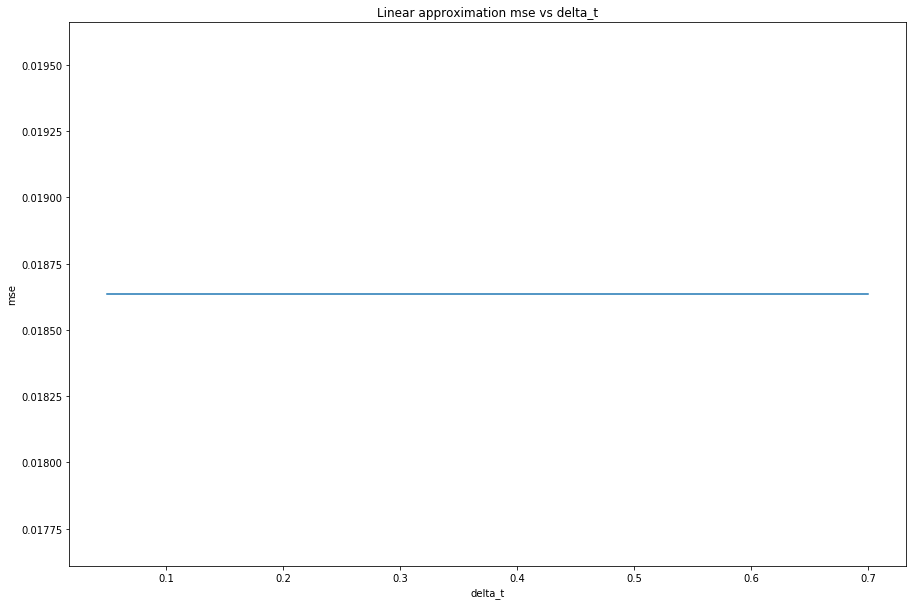

In [5]:
#print(mse_vals[:,1])
fig = plt.figure(figsize=(15, 10))
plt.plot(mse_vals[:,1],mse_vals[:,0])
plt.title('Linear approximation mse vs delta_t')
plt.xlabel('delta_t')
plt.ylabel('mse')

# Part 2

In [7]:
mse_radial_vals = []
eps = 0.5 * max(map(max, x0))
L = 100
centers = choose_centers(x0, L)
min_del_t = np.inf
min_mse = np.inf
for del_t in range(1, 10, 1):
    v = finite_diff(x0, x1, del_t/100)
    C, phy_l = rbf(x0, v, L, centers, eps)
    x_dot = np.dot(phy_l, C)
    x1_hat = x0 + x_dot * (del_t / 100)
    mse = mean_squared_error(x1, x1_hat)
    mse_radial_vals.append([del_t / 100, mse])
    if mse < min_mse:
        min_mse = mse
        min_del_t = del_t / 100
mse_radial_vals = np.asarray(mse_radial_vals)

Text(0, 0.5, 'MSE')

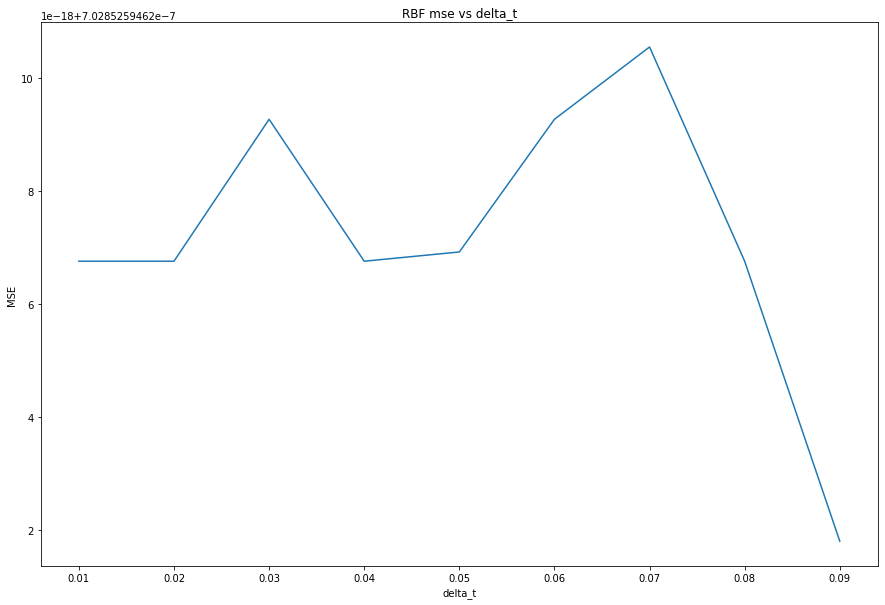

In [8]:
#print(mse_radial_vals)
fig = plt.figure(figsize=(15, 10))
plt.plot(mse_radial_vals[:,0],mse_radial_vals[:,1])
plt.title('RBF mse vs delta_t')
plt.xlabel('delta_t')
plt.ylabel('MSE')

In [14]:
print(min_mse)
print(min_del_t)

7.028525946218061e-07
0.09


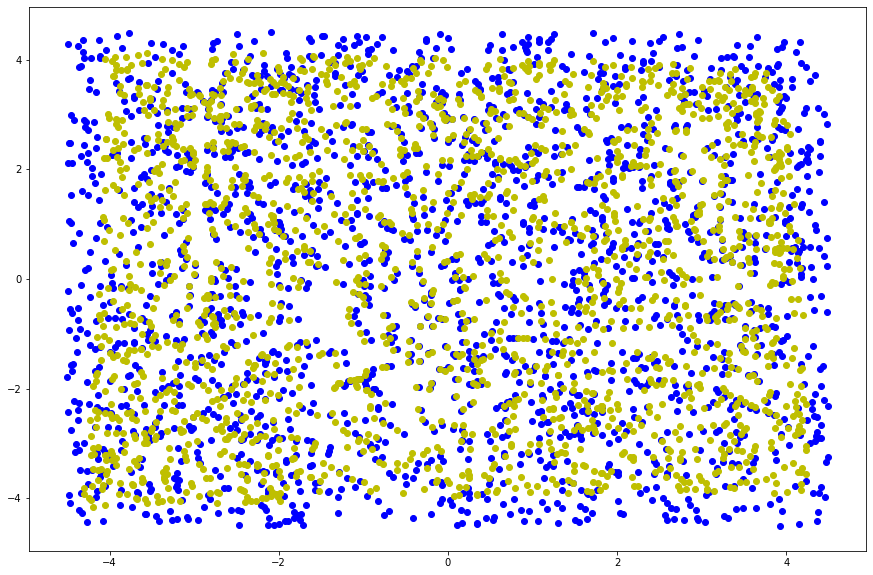

In [16]:
plt.figure(figsize=(15, 10))
plt.scatter(x0[:, 0], x0[:, 1], c='b')
plt.scatter(x1_hat[:, 0],x1_hat[:, 1], c='y')

# Part 3

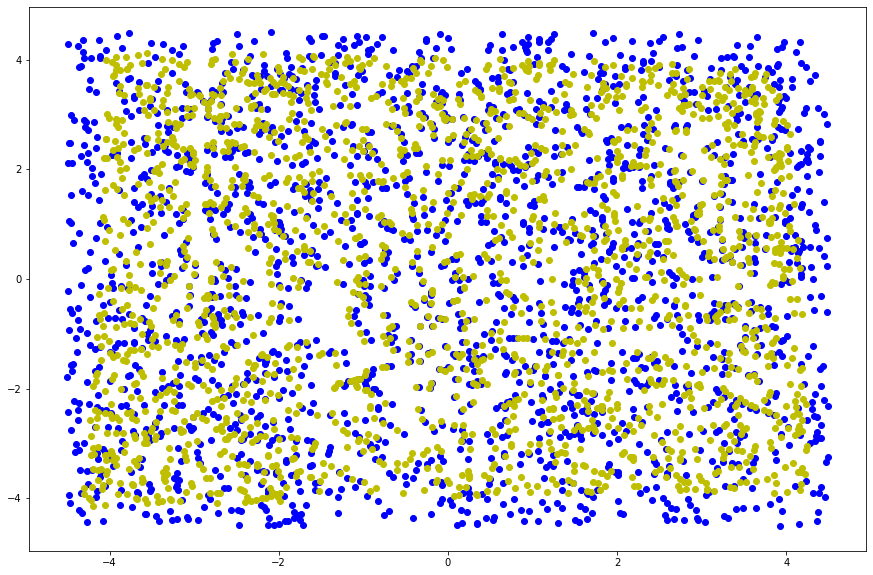

In [4]:
# Original data
plt.figure(figsize=(15, 10))
plt.scatter(x0[:, 0], x0[:, 1], c='b')
plt.scatter(x1[:, 0], x1[:, 1], c='y')

In [11]:
L = 100
eps = 0.5 * max(map(max, x0))
min_del_t = 0.9
print(eps)
centers = choose_centers(x0, L)
v = finite_diff(x0, x1, min_del_t)
C, Phy_l = rbf(x0, v, L, centers, eps)
x_dot = np.dot(Phy_l, C)
print('x_dot: ', x_dot.shape)
print(C.shape)


X = x0
#centers = choose_centers(X, L)
for i in range(30):
    Phy_l = Phy_l_(X, L, centers, eps)
    x_dot = np.dot(Phy_l, C)
    X = X + x_dot * min_del_t

2.2494410440841808
x_dot:  (2000, 2)
(100, 2)


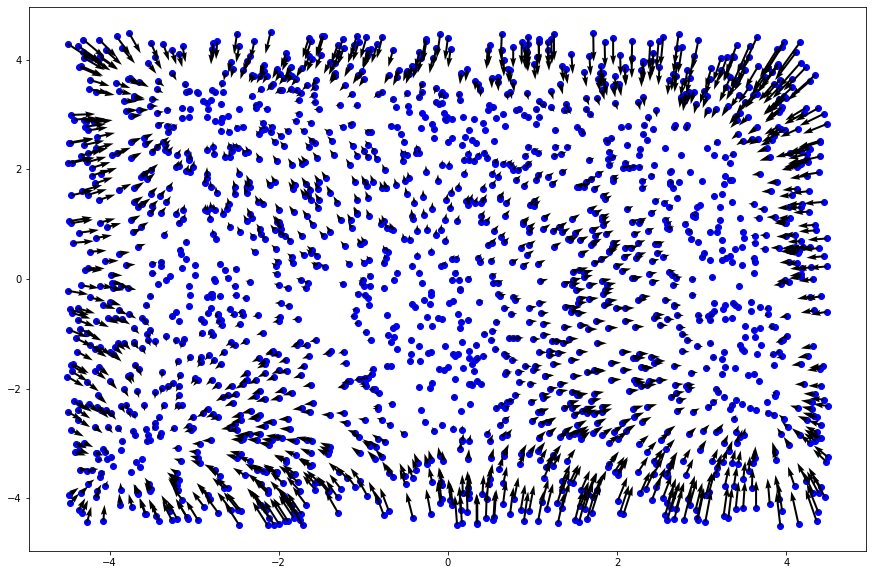

In [12]:
plt.figure(figsize=(15, 10))
plt.scatter(x0[:, 0], x0[:, 1], c='b')
plt.quiver(x0[:, 0], x0[:, 1], x_dot[:, 0], x_dot[:, 1])

In [38]:
X = x0
centers = choose_centers(X, L)
for i in range(1):
    Phy_l = Phy_l_(X, L, centers, eps)
    x_dot = np.dot(Phy_l, C)
    X = X + x_dot * min_del_t

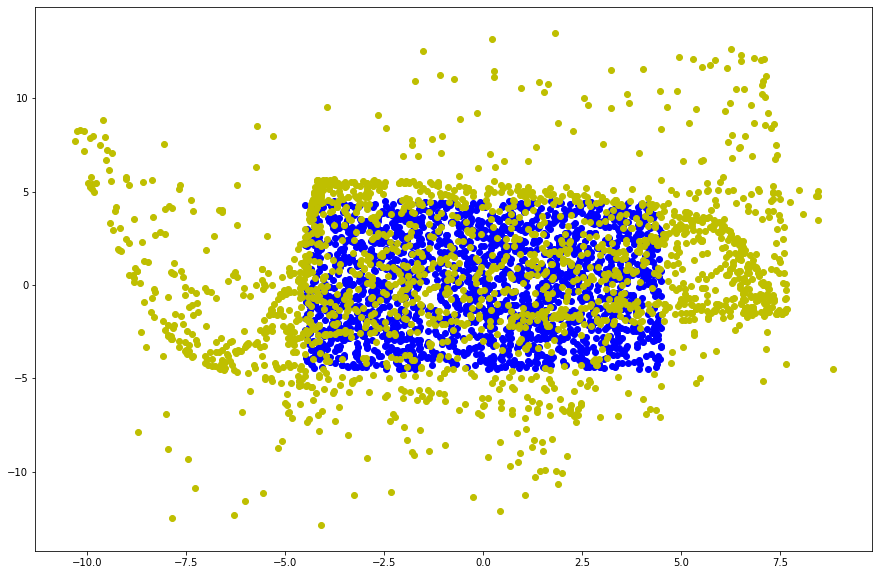

In [13]:
plt.figure(figsize=(15, 10))
plt.scatter(x0[:, 0], x0[:, 1], c='b')
plt.scatter(X[:, 0], X[:, 1], c='y')